# Multi-Head Attention,多头注意力

In [3]:
import torch
from torch import nn
import torch.nn.functional as F

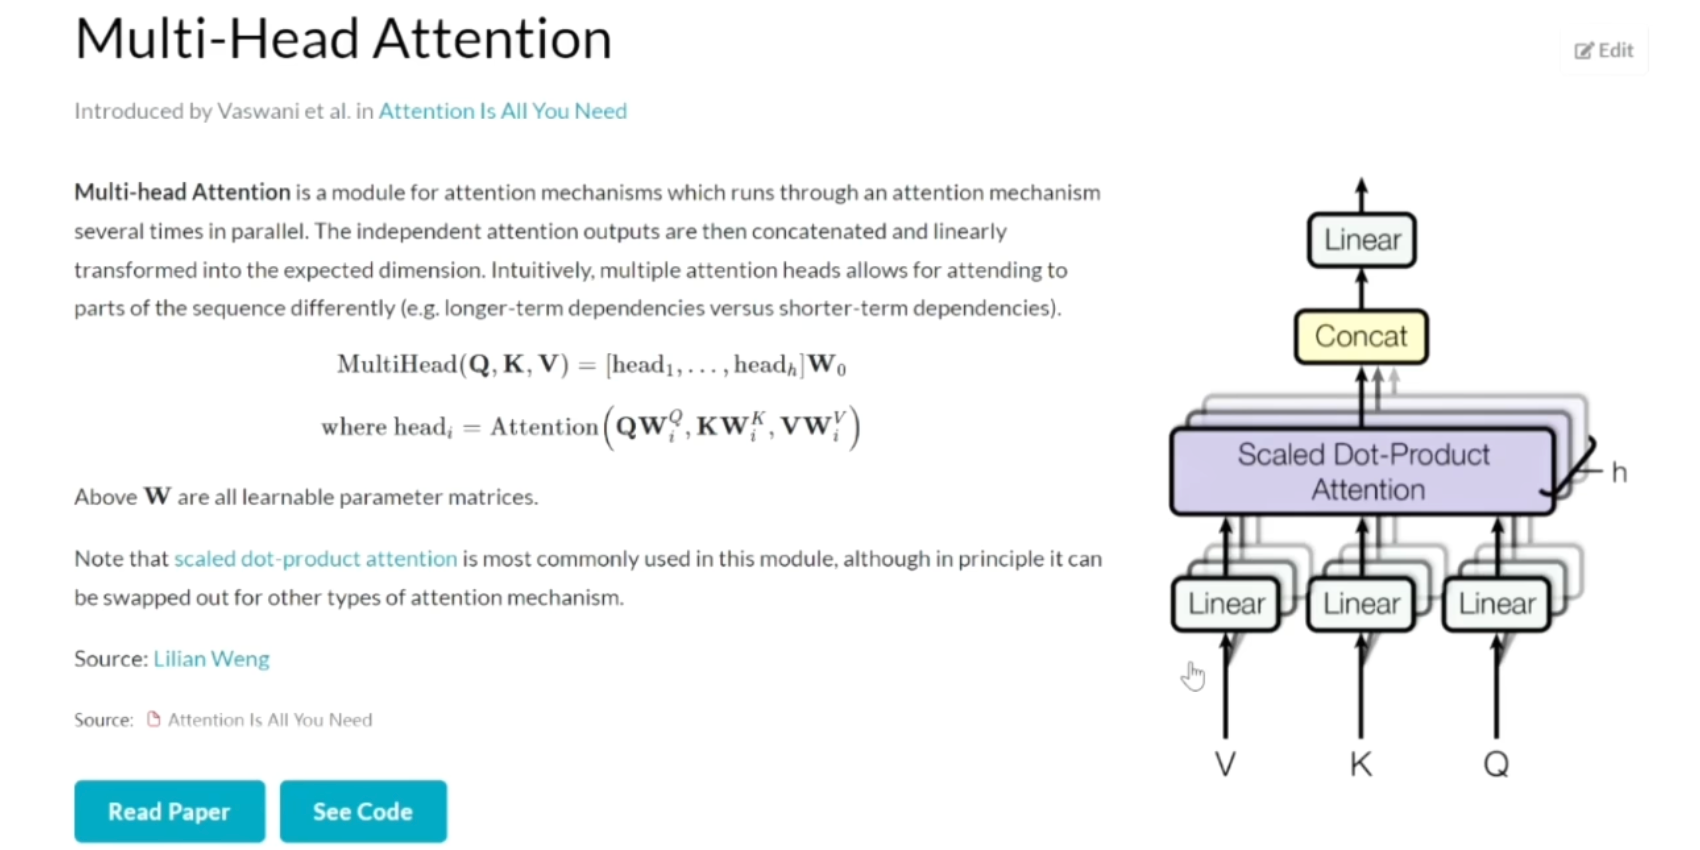

In [6]:
x = torch.rand(128, 32, 512) # (batch_size, seq_len, d_model)
d_model, n_head = 512, 8

In [8]:
class MultiHeadAttention(nn.Module):
  """
    :d_model 输入的特征维度
    :n_head 注意力头的数量
  """
  def __init__(self, d_model, n_head):
    super(MultiHeadAttention, self).__init__()
    self.n_head = n_head
    self.d_model = d_model
    self.w_q = nn.Linear(d_model, n_head)
    self.w_k = nn.Linear(d_model, n_head)
    self.w_v = nn.Linear(d_model, n_head) 
    self.w_combine = nn.Linear(d_model, n_head)  
    # 对注意力分数做一个归一化处理
    self.softmax = nn.Softmax(dim=-1)
  
  def forward(self, q, k, v,mask=None):
    batch, time, dimension = q.shape
    n_d = self.d_model // self.n_head # n_d 每个头的维度
    q, k, v = self.w_q(q), self.w_k(k), self.w_v(v)
    # 重塑为多头
    q = q.view(batch, time, self.n_head, n_d).permute(0, 2, 1, 3)
    k = k.view(batch, time, self.n_head, n_d).permute(0, 2, 1, 3)
    v = v.view(batch, time, self.n_head, n_d).permute(0, 2, 1, 3)
    # 计算注意力分数
    score = q @ k.transpose(2, 3) / math.sqrt(n_d)
    if mask is not None:
      score = score.masked_fill(mask == 0, -1e9) # 以便这个位置softmax之后非常接近于
    score = self.softmax(score) @ v # 得到加权值
    score = score.permute(0, 2, 1, 3).contiguous().view(batch, time, self.d_model)
    output = self.w_combine(score)
    return output

In [10]:
out = attention = MultiHeadAttention(d_model, n_head)
out

MultiHeadAttention(
  (w_q): Linear(in_features=512, out_features=8, bias=True)
  (w_k): Linear(in_features=512, out_features=8, bias=True)
  (w_v): Linear(in_features=512, out_features=8, bias=True)
  (w_combine): Linear(in_features=512, out_features=8, bias=True)
  (softmax): Softmax(dim=-1)
)